# Feature Importance

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/clean_dataset.pkl')
df.shape

(17474, 40)

#### Droping columns

Drop the columns that are not related to lifestyle patterns and unnecessary columns.

In [3]:
columns = ['potassium', 'sodium', 'number_of_days_moderate_intensity_activity'
           ,'mins_moderate_intensity_activity','salt_usage', 'haddock', 'mackerel', 'perch', 'porgy'
           , 'sea_bass', 'trout','insulin_uu_ml','sleep_disorder','caffeine','mins_sedentary_activity'
          ,'prediabetes','how_long_taking_insulin','insulin_unit_month_year','insulin','diabetes','cholesterol','bmi_range']
df = df.drop(columns=columns)

In [4]:
df.columns

Index(['sedentary_q', 'sodium_q', 'potassium_q', 'caffeine_q', 'gender', 'age',
       'active_duty', 'race', 'pulse_regularity', 'smoke', 'alcohol',
       'alcohol_usage', 'sleep_hour', 'salt_add_at_table',
       'salt_add_in_preparation', 'year', 'HBP', 'BMI'],
      dtype='object')

In [5]:
df.head()

,sedentary_q,sodium_q,potassium_q,caffeine_q,gender,age,active_duty,race,pulse_regularity,smoke,alcohol,alcohol_usage,sleep_hour,salt_add_at_table,salt_add_in_preparation,year,HBP,BMI
0,2,2.0,2.0,5.0,0,34.0,1,3.0,0.0,0.0,0.0,99.0,4.0,0.0,4.0,2009,1,32.3
4,2,2.0,1.0,2.0,1,60.0,1,4.0,0.0,0.0,1.0,0.0,4.0,3.0,4.0,2009,1,38.7
5,5,3.0,3.0,2.0,0,26.0,1,1.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,2009,0,33.9
17,1,1.0,1.0,1.0,1,42.0,1,4.0,0.0,1.0,1.0,0.0,10.0,3.0,3.0,2009,1,41.4
19,NaN,2.0,3.0,3.0,0,66.0,1,1.0,0.0,1.0,0.0,4.0,7.0,3.0,3.0,2009,1,28.9


#### One hot encoding for Race column

In [6]:
# race one hot encoding
race_encoder = OneHotEncoder(sparse=False)
race_onehot = race_encoder.fit_transform(df[['race']])
encoder_race_names = race_encoder.get_feature_names(['race'])
encoder_race_df = pd.DataFrame(race_onehot, columns = encoder_race_names)

In [7]:
df = pd.concat([df.reset_index(drop=True), encoder_race_df.reset_index(drop=True)], axis = 1)

In [8]:
df = df.rename(columns={
    'race_1.0': 'race_mexican_american',
    'race_2.0': 'race_other_hispanic',
    'race_3.0': 'race_white',
    'race_4.0': 'race_black',
    'race_5.0': 'race_multi_racial',
    'race_6.0': 'race_asian',
})
df = df.drop(columns=['race'])
df.head()

,sedentary_q,sodium_q,potassium_q,caffeine_q,gender,age,active_duty,pulse_regularity,smoke,alcohol,...,salt_add_in_preparation,year,HBP,BMI,race_mexican_american,race_other_hispanic,race_white,race_black,race_multi_racial,race_asian
0,2,2.0,2.0,5.0,0,34.0,1,0.0,0.0,0.0,...,4.0,2009,1,32.3,0.0,0.0,1.0,0.0,0.0,0.0
1,2,2.0,1.0,2.0,1,60.0,1,0.0,0.0,1.0,...,4.0,2009,1,38.7,0.0,0.0,0.0,1.0,0.0,0.0
2,5,3.0,3.0,2.0,0,26.0,1,0.0,0.0,0.0,...,4.0,2009,0,33.9,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1.0,1.0,1,42.0,1,0.0,1.0,1.0,...,3.0,2009,1,41.4,0.0,0.0,0.0,1.0,0.0,0.0
4,NaN,2.0,3.0,3.0,0,66.0,1,0.0,1.0,0.0,...,3.0,2009,1,28.9,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df = df.dropna()
df.shape

(13981, 23)

In [10]:
df.year.unique()

array([2009, 2011, 2013, 2015, 2017])

In [11]:
df_2017 = df[df['year'] == 2017]
df_2009 = df.drop(df_2017.index)

#### Generating training and validation dataset

In [12]:
# Generating validation and training dataset
validation_sample_1 = df_2017.sample(frac=0.50)
validation_sample_2 = df_2009.sample(frac=0.25)

df_2017 = df_2017.drop(validation_sample_1.index)
df_2009 = df_2009.drop(validation_sample_2.index)

validation = pd.concat([validation_sample_1, validation_sample_2])
train = pd.concat([df_2017, df_2009])

train = train.drop(columns=['year'])
validation = validation.drop(columns=['year'])
df = df.drop(columns=['year'])

joblib.dump(validation, '/dsa/groups/capstonesp2022/on-campus/group_1/data/validation_dataset.pkl')
joblib.dump(train, '/dsa/groups/capstonesp2022/on-campus/group_1/data/train_dataset.pkl')
joblib.dump(df, '/dsa/groups/capstonesp2022/on-campus/group_1/data/model_dataset.pkl')

['/dsa/groups/capstonesp2022/on-campus/group_1/data/model_dataset.pkl']

In [13]:
print("Validation", validation.shape)
print("Train", train.shape)

Validation (4094, 22)
Train (9887, 22)


In [14]:
model = GradientBoostingClassifier()
df = train
# Cheking interaction betweem age and BMI
df['interaction_age_bmi'] = df['age'] * df['BMI']

In [15]:
def feature_imporatance(df, model):
    default_features = list(df.columns)
    default_features.remove('HBP')
    target = 'HBP'
    
    X = df[default_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    features = df.drop(['HBP'], axis = 1)
    model.fit(X_train, y_train)
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
    return list(map(lambda x: [x[0], x[1]], feature_importances))

In [16]:
default_imporatance = feature_imporatance(df, model)

Variable: interaction_age_bmi  Importance: 0.693
Variable: age                  Importance: 0.1419
Variable: BMI                  Importance: 0.0365
Variable: gender               Importance: 0.0301
Variable: race_black           Importance: 0.0228
Variable: alcohol_usage        Importance: 0.0179
Variable: race_mexican_american Importance: 0.0116
Variable: sleep_hour           Importance: 0.0099
Variable: potassium_q          Importance: 0.0071
Variable: sodium_q             Importance: 0.005
Variable: salt_add_at_table    Importance: 0.0045
Variable: salt_add_in_preparation Importance: 0.0043
Variable: smoke                Importance: 0.004
Variable: alcohol              Importance: 0.0036
Variable: caffeine_q           Importance: 0.002
Variable: sedentary_q          Importance: 0.0018
Variable: race_white           Importance: 0.0011
Variable: race_multi_racial    Importance: 0.001
Variable: active_duty          Importance: 0.0009
Variable: race_other_hispanic  Importance: 0.0004
V

Feature importance by age groups.

In [17]:
young_age = df[df['age'] <= 40]
middle_age = df[(df['age'] > 40) & (df['age'] <= 60)]
old_age = df[(df['age'] > 60)]

In [18]:
print('Young\n')
feature_imporatance_young = feature_imporatance(young_age, model)
print('\nMid\n')
feature_imporatance_mid = feature_imporatance(middle_age, model)
print('\nOld\n')
feature_imporatance_old = feature_imporatance(old_age, model)

Young

Variable: interaction_age_bmi  Importance: 0.5075
Variable: BMI                  Importance: 0.14
Variable: gender               Importance: 0.0874
Variable: sleep_hour           Importance: 0.0441
Variable: age                  Importance: 0.0408
Variable: alcohol_usage        Importance: 0.0209
Variable: smoke                Importance: 0.0206
Variable: sodium_q             Importance: 0.0189
Variable: salt_add_in_preparation Importance: 0.0187
Variable: potassium_q          Importance: 0.0167
Variable: salt_add_at_table    Importance: 0.0157
Variable: race_other_hispanic  Importance: 0.0137
Variable: race_black           Importance: 0.0122
Variable: caffeine_q           Importance: 0.0095
Variable: active_duty          Importance: 0.0077
Variable: alcohol              Importance: 0.0077
Variable: race_mexican_american Importance: 0.0065
Variable: sedentary_q          Importance: 0.0041
Variable: race_multi_racial    Importance: 0.0028
Variable: pulse_regularity     Importance

In [19]:
def convert_to_dict(x):
    tmp = dict()
    for item in x:
        tmp[item[0]] = item[1]
    return tmp

In [20]:
young = list(map(lambda x: {'value': x[1], 'column': x[0], 'type': '20 - 40'}, feature_imporatance_young))
mid = list(map(lambda x: {'value': x[1], 'column': x[0], 'type': '41 - 60'}, feature_imporatance_mid))
old = list(map(lambda x: {'value': x[1], 'column': x[0], 'type': '60+'}, feature_imporatance_old))
default = list(map(lambda x: {'value': x[1], 'column': x[0], 'type': 'All'}, default_imporatance))

default.extend(young)
default.extend(mid)
default.extend(old)

In [21]:
feature_imporatance_young.append(["type", "20 - 40"])
feature_imporatance_mid.append(["type", "41 - 60"])
feature_imporatance_old.append(["type", "60+"])
default_imporatance.append(["type", "All"])

feature_importance_compare = [convert_to_dict(feature_imporatance_young)
    ,convert_to_dict(feature_imporatance_mid)
    ,convert_to_dict(feature_imporatance_old)
    ,convert_to_dict(default_imporatance)]

In [22]:
#df = pd.DataFrame(data=feature_importance_compare)
df = pd.DataFrame(data=default)

In [23]:
table = df.rename(columns={'value': 'Importance', 'column': 'Feature'})
table = table[table['type']=='All']
table[['Importance', 'Feature']]

,Importance,Feature
0,0.6930,interaction_age_bmi
1,0.1419,age
2,0.0365,BMI
3,0.0301,gender
4,0.0228,race_black
5,0.0179,alcohol_usage
6,0.0116,race_mexican_american
7,0.0099,sleep_hour
8,0.0071,potassium_q
9,0.0050,sodium_q


In [24]:
df.head(10)

,value,column,type
0,0.6930,interaction_age_bmi,All
1,0.1419,age,All
2,0.0365,BMI,All
3,0.0301,gender,All
4,0.0228,race_black,All
5,0.0179,alcohol_usage,All
6,0.0116,race_mexican_american,All
7,0.0099,sleep_hour,All
8,0.0071,potassium_q,All
9,0.0050,sodium_q,All


In [25]:
tmp = df[(df['column']=='age')| \
         (df['column']=='BMI')| \
         (df['column']=='gender')| \
         (df['column']=='race_black')| \
         (df['column']=='sleep_hour')| \
         (df['column']=='alcohol_usage')| \
         (df['column']=='salt_add_in_preparation')| \
         (df['column']=='potassium_q')| \
         (df['column']=='smoke')| \
         (df['column']=='race_mexican_american')
        ]

Text(0, 0.5, 'Importance')

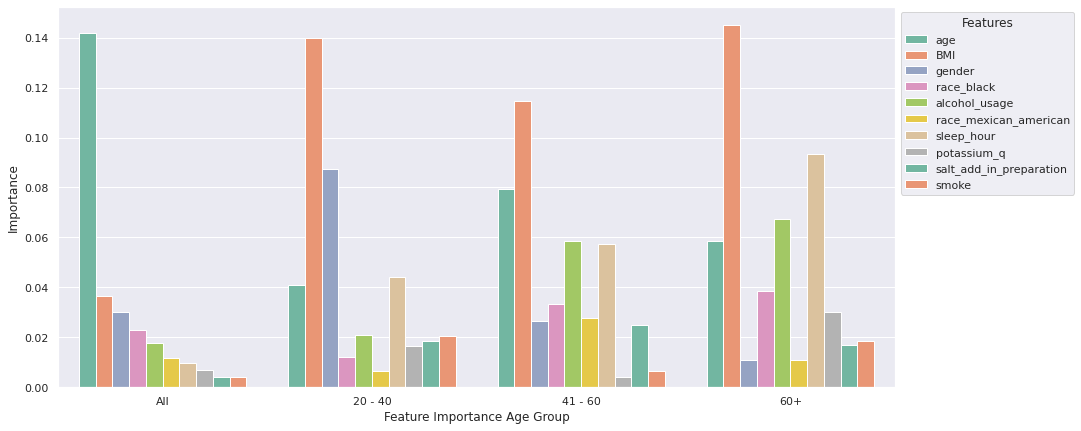

In [26]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
#sort = results.sort_values(by='f1', ascending=False).model_name.values
ax = sns.barplot(data=tmp, x='type', y='value',  palette='Set2', hue='column')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Features", loc='upper left',bbox_to_anchor = (1,1))
ax.set_xlabel("Feature Importance Age Group")
ax.set_ylabel("Importance")

Text(0, 0.5, 'Importance')

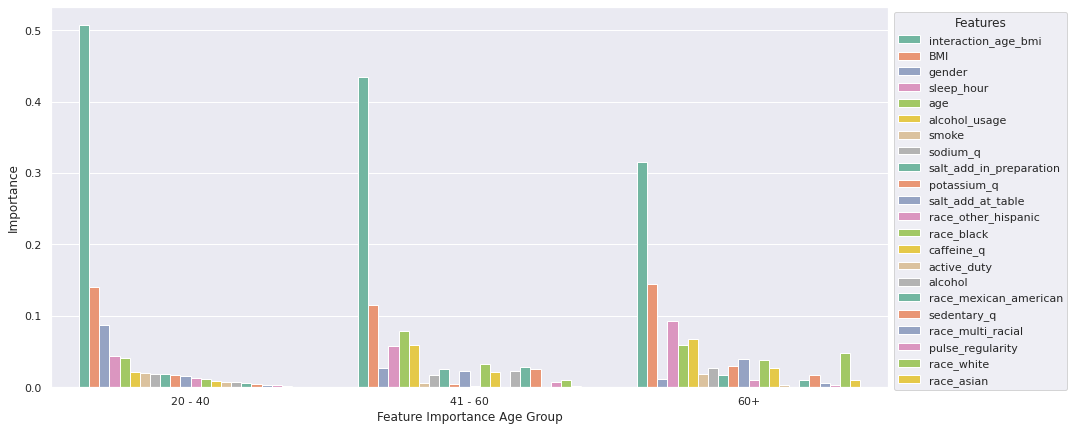

In [27]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
#sort = results.sort_values(by='f1', ascending=False).model_name.values
ax = sns.barplot(data=df[df['type']!='All'], x='type', y='value',  palette='Set2', hue='column')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Features", loc='upper left',bbox_to_anchor = (1,1))
ax.set_xlabel("Feature Importance Age Group")
ax.set_ylabel("Importance")

In [28]:
table[[ 'Feature', 'Importance']]

,Feature,Importance
0,interaction_age_bmi,0.6930
1,age,0.1419
2,BMI,0.0365
3,gender,0.0301
4,race_black,0.0228
5,alcohol_usage,0.0179
6,race_mexican_american,0.0116
7,sleep_hour,0.0099
8,potassium_q,0.0071
9,sodium_q,0.0050
